In [1]:
import handcalcs.render
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st

In [2]:
L_O=-45       #Longitude Hora Legal
L =-46.6388  #Longitude 
L_a= -23.5489  #Latitude
Beta=0           #Inclinação 
GSC=1.367         #Constante solar  KW/m^2

In [3]:
df=pd.read_csv("Dados Segundo exercicio.csv" , encoding ='UTF-8' , sep=";")



NUMERO DO DIA NO ANO

In [4]:
df['n']= df['Dia']  + (df['Mês'] -1)*30 +df['Cor']


CALCULO DA HORA SOLAR 

In [5]:
df['B']= (360/364)*(df['n']-81)

In [6]:
df['E']= 9.87*np.sin(np.radians(2*df['B']))-7.53*np.cos(np.radians(df['B']))-1.5*np.sin(np.radians(df['B']))

In [7]:
df['Corhora']= (4*(L_O-L)+df['E'])/60

In [8]:
HL=14.50


In [9]:
df['HS']= HL+df['Corhora']


ÂNGULO HORARIO

In [10]:
df['Omega']= (df['HS']-12)*15

DECLINAÇÃO SOLAR 

In [11]:
df['sigma']= 23.45*np.sin(np.radians(360/365*(284+df['n'])))

ÂNGULO ZENITAL 

In [12]:
df['teta_z']= np.degrees(np.arccos(np.sin(np.radians(df['sigma']))*(np.sin(np.radians(L_a))+np.cos(np.radians(df['sigma']))*np.cos(np.radians(L_a))*np.cos(np.radians(df['Omega'])))))



ÂNGULO DE INCIDENCIA 

In [13]:
df['teta']=np.degrees(np.arccos(np.cos(np.radians(L_a+Beta)*np.cos(np.radians(df['sigma']))*np.cos(np.radians(df['Omega']))+np.sin(np.radians(L_a+Beta))*np.sin(np.radians(df['sigma'])))))


IRRADIAÇÃO EXTRATERRESTE SOBRE UMA SUPERFICIE HORIZONTAL EM UM PONTO DA TERRA

In [14]:
df['GO']=GSC*(1+0.033*np.cos(np.radians((360*df['n'])/365)))*np.cos(np.radians(df['teta_z']))


ÂNGULO HORÁRIO DO PÔR DO SOL 

In [15]:
df['omega_s']=np.degrees(np.arccos((-np.tan(np.radians(L_a))*np.tan(np.radians(df['sigma'])))))


IRRADIAÇÃO EXTRATERRESTRE INTEGRADA HORARI SOBRE SUPERFICIE HORIZONTAL 

In [16]:
df['HO']=((2.75*10**4)*GSC*((1+0.033*np.cos(np.radians((360*df['n'])/365))))*(((1.75*10**-2)*df['omega_s']*np.sin(np.radians(df['sigma']))*np.sin(np.radians(L_a))+np.cos(np.radians(df['sigma']))*np.cos(np.radians(L_a))*np.sin(np.radians(df['omega_s'])))))/1000


In [17]:
df['H']=pd.read_csv("Irradiação integrada diaria.csv" , encoding ='UTF-8' , sep=";")


In [18]:
df['KT']=df['H']/df['HO']


In [19]:
df['Hd/H']=0.775+0.0065*(df['omega_s']-90)-(0.505+0.00455*(df['omega_s']-90))*np.cos(np.radians(115*df['KT']-103))


In [20]:
df['Hd']=df['Hd/H']*df['H']


In [21]:
df['Hb']=df['H']-df['Hd']


Text(0, 0.5, 'Irradiação Solar ')

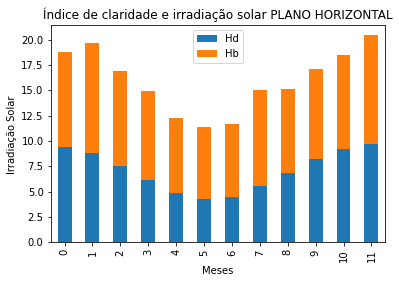

In [22]:
df[["Hd", "Hb", ]].plot(kind="bar", stacked=True)
plt.title("Índice de claridade e irradiação solar PLANO HORIZONTAL")
plt.xlabel("Meses")
plt.ylabel("Irradiação Solar ")

Superficie no hemisferio Sul  

In [23]:
Beta_incli=45

In [24]:
df['omega_s*']=np.degrees(np.arccos((-np.tan(np.radians(L_a+Beta_incli))*np.tan(np.radians(df['sigma'])))))


In [25]:
df['Rb']=(np.cos(np.radians(L_a+Beta_incli))*np.cos(np.radians(df['sigma']))*np.sin(np.radians(df['omega_s*']))+(np.pi/180)*df['omega_s*']*np.sin(np.radians(L_a+Beta_incli))*np.sin(np.radians(df['sigma'])))/(np.cos(np.radians(L_a))*np.cos(np.radians(df['sigma']))*np.sin(np.radians(df['omega_s']))+(np.pi/180)*df['omega_s']*np.sin(np.radians(L_a))*np.sin(np.radians(df['sigma'])))


In [26]:
rho=0.2

In [27]:
df['R']=(1-df['Hd/H'])*df['Rb']+df['Hd/H']*((1+np.cos(np.radians(Beta_incli)))/2)+rho*(((1-np.cos(np.radians(Beta_incli)))/2))


In [28]:
df['HT']=df['R']*df['H']


In [29]:
df['HTb']=(1-df['Hd/H'])*df['Rb']*df['H']


In [30]:
df['HTd']=df['Hd/H']*((1+np.cos(np.radians(Beta_incli)))/2)*df['H']


In [31]:
df['HTr']=rho*(((1-np.cos(np.radians(Beta_incli)))/2))*df['H']
df


,Dia,Cor,Mês,n,B,E,Corhora,HS,Omega,sigma,...,Hd/H,Hd,Hb,omega_s*,Rb,R,HT,HTb,HTd,HTr
0,15,0,1,15,-65.274725,-9.286743,-0.045526,14.454474,36.817114,-21.269474,...,0.501132,9.417272,9.374728,81.201851,0.611476,0.762078,14.320973,5.732423,8.038145,0.550405
1,15,1,2,46,-34.615385,-14.573582,-0.133640,14.366360,35.495405,-13.289156,...,0.446415,8.806876,10.921124,84.675003,0.746919,0.823812,16.252156,8.157197,7.517139,0.577820
2,15,-1,3,74,-6.923077,-9.656338,-0.051686,14.448314,36.724715,-2.818879,...,0.447020,7.563581,9.356419,88.891429,0.952299,0.937447,15.861603,8.910108,6.455920,0.495575
3,15,0,4,105,23.736264,-0.223084,0.105535,14.605535,39.083029,9.414893,...,0.409361,6.101122,8.802878,93.735652,1.261221,1.123627,16.746536,11.102374,5.207633,0.436528
4,15,0,5,135,53.406593,3.754880,0.171835,14.671835,40.077520,18.791918,...,0.395092,4.864378,7.447622,97.683495,1.590602,1.328689,16.358820,11.846204,4.152007,0.360610
5,15,1,6,166,84.065934,-0.240580,0.105244,14.605244,39.078655,23.314410,...,0.375049,4.280057,7.131943,99.749294,1.798835,1.473597,16.816693,12.829186,3.653257,0.334250
6,15,1,7,196,113.736264,-5.615811,0.015656,14.515656,37.734847,21.517336,...,0.384968,4.490268,7.173732,98.911843,1.711056,1.410234,16.448970,12.274656,3.832683,0.341631
7,15,2,8,227,144.395604,-4.094882,0.041005,14.541005,38.115080,13.783564,...,0.367588,5.543221,9.536779,95.531450,1.401007,1.229059,18.534210,13.361092,4.731435,0.441683
8,15,3,9,258,175.054945,5.677410,0.203877,14.703877,40.558152,2.216887,...,0.451463,6.826123,8.293877,90.871539,1.067805,1.000368,15.125562,8.856247,5.826460,0.442855
9,15,3,10,288,204.725275,14.966751,0.358699,14.858699,42.880488,-9.599397,...,0.476679,8.168366,8.967634,86.189657,0.814970,0.862651,14.782391,7.308353,6.972137,0.501902


Text(0, 0.5, 'Irradiação Solar ')

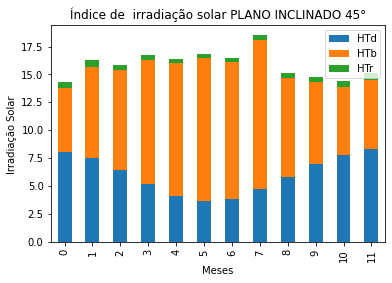

In [32]:
df[["HTd", "HTb", "HTr"]].plot(kind="bar", stacked=True)
plt.title("Índice de  irradiação solar PLANO INCLINADO 45°")
plt.xlabel("Meses")
plt.ylabel("Irradiação Solar ")

In [33]:
df1=pd.DataFrame({"Mês":df['Mês'],"Omega_s*":df['omega_s*'],"Rb*":df['Rb'],"R":df['R'],"HT":df['HT'],"HTd":df['HTd'],"HTb":df['HTb'],"HTr":df['HTr']})
df1

,Mês,Omega_s*,Rb*,R,HT,HTd,HTb,HTr
0,1,81.201851,0.611476,0.762078,14.320973,8.038145,5.732423,0.550405
1,2,84.675003,0.746919,0.823812,16.252156,7.517139,8.157197,0.577820
2,3,88.891429,0.952299,0.937447,15.861603,6.455920,8.910108,0.495575
3,4,93.735652,1.261221,1.123627,16.746536,5.207633,11.102374,0.436528
4,5,97.683495,1.590602,1.328689,16.358820,4.152007,11.846204,0.360610
5,6,99.749294,1.798835,1.473597,16.816693,3.653257,12.829186,0.334250
6,7,98.911843,1.711056,1.410234,16.448970,3.832683,12.274656,0.341631
7,8,95.531450,1.401007,1.229059,18.534210,4.731435,13.361092,0.441683
8,9,90.871539,1.067805,1.000368,15.125562,5.826460,8.856247,0.442855
9,10,86.189657,0.814970,0.862651,14.782391,6.972137,7.308353,0.501902
